In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from helpers.text_processing import clean_text

import pandas as pd
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/katerynamelnykova/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katerynamelnykova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 1: Read and clean the data

In [2]:
true_news = pd.read_csv("../data/True.csv")
fake_news = pd.read_csv("../data/Fake.csv")

pd.concat([true_news.head(), true_news.tail()])


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [3]:
pd.concat([fake_news.head(), fake_news.tail()])


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


Concatenate the real and fake datasets, reset the index, and shuffle the combined data to avoid order bias

In [4]:
fake_news["label"] = 0
true_news["label"] = 1

news = pd.concat([fake_news, true_news], ignore_index=True)
news = news.sample(frac=1, random_state=42).reset_index(drop=True)

news.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [5]:
news["text"] = news["text"].apply(clean_text)

news.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,st century wire says ben stein reputable profe...,US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,washington reuters us president donald trump r...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,monday donald trump embarrassed country accide...,News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,glasgow scotland reuters us presidential candi...,politicsNews,"June 24, 2016",1


In [6]:
news = news[["text", "label"]]

print(f"Dataset size before removing NA values: {news.count()}")

news['text'].replace(r'^\s*$', pd.NA, regex=True, inplace=True)
news.dropna(subset=['text'], inplace=True)

print(f"Dataset size after removing NA values: {news.count()}")

news = news.drop_duplicates()
print(f"Dataset size after removing duplicates: {news.count()}")

news.to_csv("../data/isot_news.csv", index=0)


Dataset size before removing NA values: text     44898
label    44898
dtype: int64
Dataset size after removing NA values: text     44266
label    44266
dtype: int64
Dataset size after removing duplicates: text     38613
label    38613
dtype: int64


/var/folders/71/gl2n_19n51nbm2sqzk_y4x9r0000gn/T/ipykernel_41256/3200828520.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news['text'].replace(r'^\s*$', pd.NA, regex=True, inplace=True)


label
1    21167
0    17446
Name: count, dtype: int64


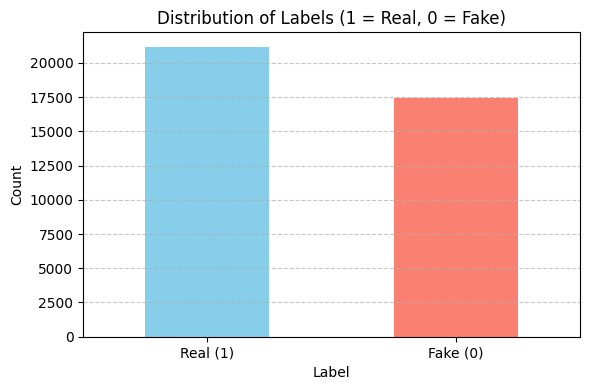

In [7]:
label_counts = news['label'].value_counts()
print(label_counts)

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Labels (1 = Real, 0 = Fake)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real (1)', 'Fake (0)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()